In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [7]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

## Data preparation

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [8]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [9]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [10]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
# transform dictionary type to dataframe
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [12]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.head(5)
#0 means malignant tumor, 1 mean benign tumor

,tumor type
0,0
1,0
2,0
3,0
4,0


In [13]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

To make it easier to do visual check of the data, we remove the encoding

In [14]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Subject

We have here a large data set that could help to predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of predictors that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 7 (classification assessment).</font>

* We check at first if the tumor radius is a good predictor for breast cancer.
  * Make data exploration on mean radius, taking into account the target class attributions (examples: density plots or boxplots for each tumor type). Do you think it can make an good predictor?
  * Encode the target and plot it with respect to mean radius.
  * Do a train-test split and train a logistic regression.
  * On your latter plot, add the curve of the probability $P\left( Y=1 \left| X=x \right. \right)$. Here $Y$ is the tumor type and $x$ is the mean radius.
  * According to your model, what is the minimum value for mean radius for considering that the tumor is malignant? Compute prediction of class attribution (tumor type) for several values of mean radius to check your intuition.
  * <font color=red>Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix.</font> 
  * <font color=red>Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why? How can we adapt the sensibility of the prediction?</font> 
* We decide to add an extra predictor to our model. 
  * Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
  * Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
  * <font color=red>How have the classification performances increased?</font> 
* Comparison of the two models: 
  * <font color=red>Plot the ROC curves of the two previous models and make the comparison.</font> 
  * <font color=red>Compute the LogLoss values of the two previous models and make the comparison.</font> 

# 1 Perform data exploration on mean radius, taking into account the target class attributions. Do you think mean radius can make an good predictor of tumor type?

In [15]:
#First Step Let's merge subdata into one data
dataset = pd.merge(features,target,left_index=True,right_index=True)
dataset.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


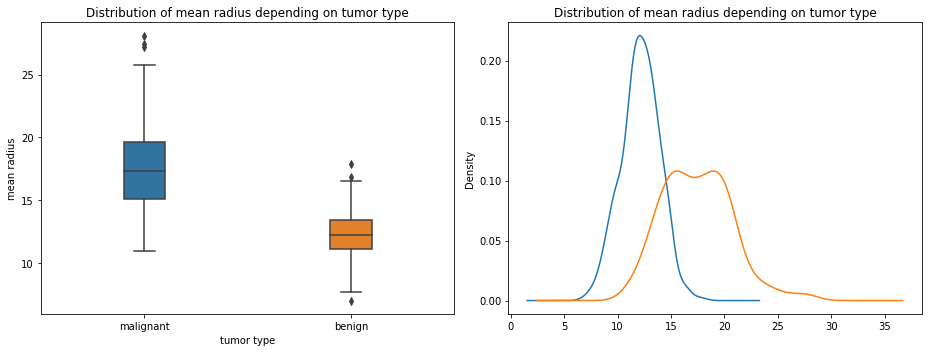

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

sns.boxplot(y='mean radius', x='tumor type', data = dataset, width = 0.2, ax = axes[0])
axes[0].set_title('Distribution of mean radius depending on tumor type')

dataset.groupby("tumor type")["mean radius"].plot(kind='density',ax = axes[1])
axes[1].set_title('Distribution of mean radius depending on tumor type')

plt.tight_layout()
plt.show()

The distribution of mean radius is clearly difference for tumor types. So, it seems that mean radius can be a good predictor.

# 2 Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.¶

In [17]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['tumor type']= label_encoder.fit_transform(dataset['tumor type'])

In [18]:
dataset.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# 3 Plot the target variable with respect to mean radius (scatter plot). Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not?

<AxesSubplot:xlabel='mean radius', ylabel='tumor type'>

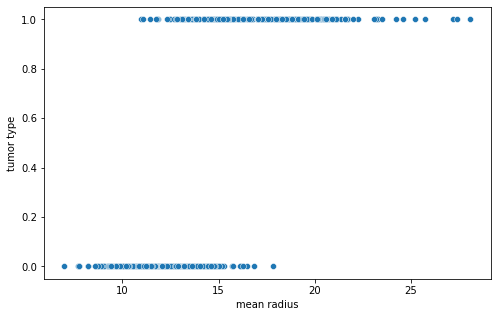

In [19]:
plt.figure(figsize=[8,5])
sns.scatterplot(data=dataset, x="mean radius", y="tumor type")

Based on the plot. A logistic regression model can model the relationship between the two variable reasonably well because the target depends on the mean radius.

# 4 Train a logistic regression model.

In [67]:
X = dataset[['mean radius']].values
#X = dataset['mean radius'].values.reshape(-1,1)
y = dataset['tumor type']


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature scaling:

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the logistic regression model

In [70]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# 5 Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of mean radius, according to your logistic regression model.

On your latter plot, add the curve of the probability  𝑃(𝑌=1|𝑋=𝑥) . Here  𝑌  is the tumor type and  𝑥  is the mean radius.

Text(0.5, 1.0, 'Probability of having a malignant tumor')

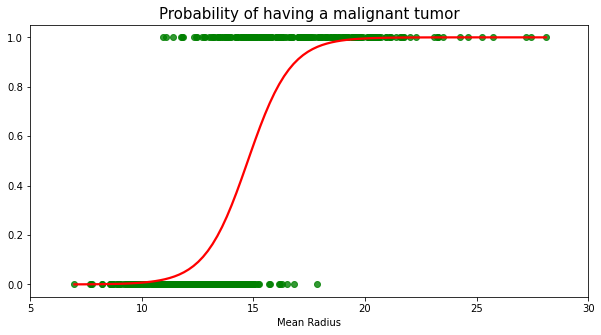

In [31]:
#method 1
plt.figure(figsize = [10, 5])
sns.regplot(x=X, y=y, logistic=True, ci=None, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.xlim([5, 30])
plt.xlabel('Mean Radius')
plt.title("Probability of having a malignant tumor", size=15)

In [32]:
#method 2
# We define a set of x values
X_set = np.arange(0, 30, 0.1)
X_set = X_set.reshape(-1,1)
y_proba = log_reg.predict_proba(sc.transform(X_set))
y_score = y_proba[:,1]


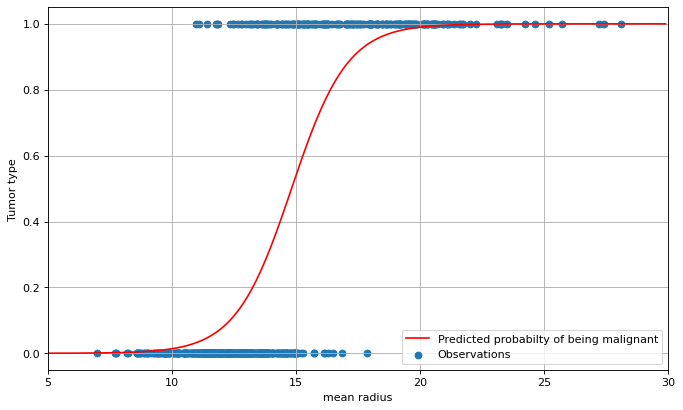

In [33]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(dataset['mean radius'], dataset['tumor type'], label='Observations')
plt.plot(X_set, y_score, c='red', label='Predicted probabilty of being malignant')
plt.xlim([5, 30])
plt.xlabel("mean radius")
plt.ylabel("Tumor type")
plt.legend()
plt.grid()
plt.show()

# 6 According to your model, what is the minimum value for mean radius for considering that the tumor is malignant? Compute prediction of class attribution (tumor type) for several values of mean radius to check your intuition.

In [34]:
arr = dataset['mean radius'].values
list = []
for i in arr:
    if log_reg.predict(sc.transform([[i]])) == 1:
        list.append(i)
print(f'The minimum mean radius value for considering that the tumor is malignant is: {min(list)}')

The minimum mean radius value for considering that the tumor is malignant is: 14.86


In [35]:
mean_radius=17
print(log_reg.predict(sc.transform([[mean_radius]])))

[1]


In [36]:
mean_radius=10
print(log_reg.predict(sc.transform([[mean_radius]])))

[0]


# 7 Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well. Comment your results. What can you say about your model's performance?

Make proba

In [37]:
y_proba = log_reg.predict_proba(X_test)
y_proba[:10]

array([[0.77864652, 0.22135348],
       [0.80627905, 0.19372095],
       [0.67015463, 0.32984537],
       [0.62161353, 0.37838647],
       [0.82996408, 0.17003592],
       [0.95612735, 0.04387265],
       [0.9207811 , 0.0792189 ],
       [0.94063649, 0.05936351],
       [0.99812743, 0.00187257],
       [0.98266889, 0.01733111]])

In [38]:
#Prediction of the class and comparison with the true one:
y_pred = log_reg.predict(X_test)
#y_pred dc auyet dinh boi y_proba ()
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  6]
 [ 8 45]]


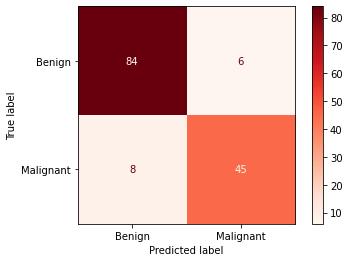

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay(cm, display_labels=["Benign", "Malignant"]).plot(cmap='Reds')

In [41]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[1, 1] / (cm[0, 1]  + cm[1, 1])
recall = cm[1, 1] / (cm[1, 0]  + cm[1, 1])
f1 = 2 * precision * recall / (precision + recall)

print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy,2)))
print('Precision (proportion of true malignant among tumor type prediction) is ' + str(round(precision,3)))
print('Recall (proportion of true malignant that are correctly predicted) is ' + str(round(recall,3)))
print('F1 score (combination of prediction and recall) is ' + str(round(f1, 3)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true malignant among tumor type prediction) is 0.882
Recall (proportion of true malignant that are correctly predicted) is 0.849
F1 score (combination of prediction and recall) is 0.865


# 8 Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why? How can we adapt the sensibility of the prediction?

For medical diagnosis, it is often prefered to have the lowest number of false negatives (non detections) because it could be dramatic for people suffering from cancer not to be detected on time. in that context, we will focus in the recall and try to make it high. One way of doing this is to lower the detection thresold. Smaller tumors will predict cancer and it will increase the recall (less false negatives). In parallel, there will be more false positive( false alarms)
but with further medial test, we can check if the detection is confirmed or not.

# 9 BONUS: Tweak your model's prediction the way you proposed in your answer of question 8. Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. Comment your results.

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        90
           1       0.76      0.94      0.84        53

    accuracy                           0.87       143
   macro avg       0.86      0.88      0.86       143
weighted avg       0.89      0.87      0.87       143



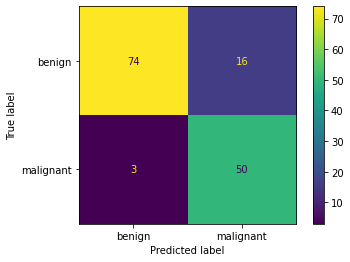

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

threshold = 0.25
# Tăng Recall thì giảm tiêu chuẩn ngưỡng detect positive để detect được xác suất của positive cao( bất chất đúng sai)thực tế sai positive không phải vấn đề trong detect bệnh ( thà nhầm positive còn hơn nhầm negative)., đồng nghĩa miền detect của negative bị thu hẹp lại vậy Recall sẽ tăng 
y_pred_lower = (log_reg.predict_proba(X_test) > threshold)[:,1] * 1

print(classification_report(y_test, y_pred_lower))
confmat = confusion_matrix(y_test, y_pred_lower)
_ = ConfusionMatrixDisplay(confmat, display_labels=label_encoder.classes_).plot()

# 10 Inspect the data in order to tell — between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).

In [43]:
dataset['tumor type'].unique()

array([1, 0])

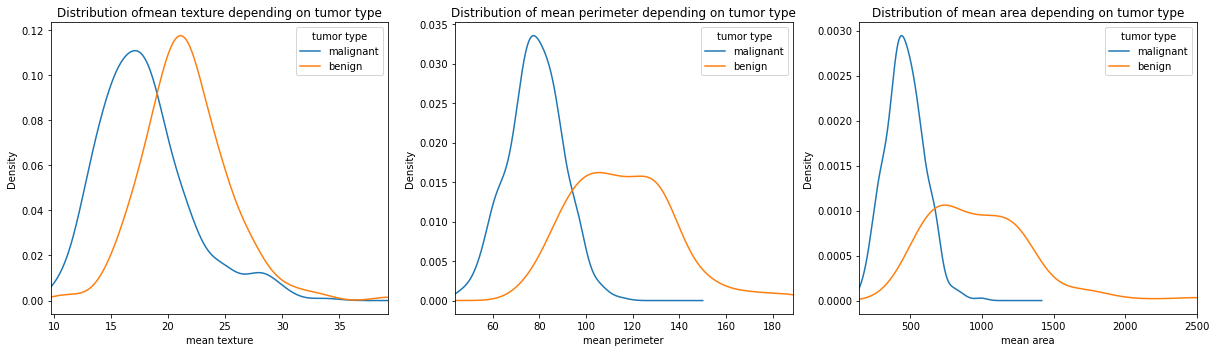

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,5))

plt.subplot(1, 3, 1)
dataset.groupby("tumor type")["mean texture"].plot(kind='density')
plt.xlim(dataset['mean texture'].min(),dataset['mean texture'].max())
plt.legend(title = 'tumor type', labels =['malignant','benign']) # add label names
plt.xlabel('mean texture')
plt.title('Distribution ofmean texture depending on tumor type')

plt.subplot(1, 3, 2)
dataset.groupby("tumor type")["mean perimeter"].plot(kind='density')
plt.xlim(dataset['mean perimeter'].min(),dataset['mean perimeter'].max())
plt.legend(title = 'tumor type', labels =['malignant','benign']) # add label names
plt.xlabel('mean perimeter')
plt.title('Distribution of mean perimeter depending on tumor type')

plt.subplot(1, 3, 3)
dataset.groupby("tumor type")["mean area"].plot(kind='density')
plt.xlim(dataset['mean area'].min(),dataset['mean area'].max())
plt.legend(title = 'tumor type', labels =['malignant','benign']) # add label names
plt.xlabel('mean area')
plt.title('Distribution of mean area depending on tumor type')

plt.tight_layout()
plt.show()

In [47]:
sub_data = dataset[['mean radius','mean texture','mean perimeter','mean area']]


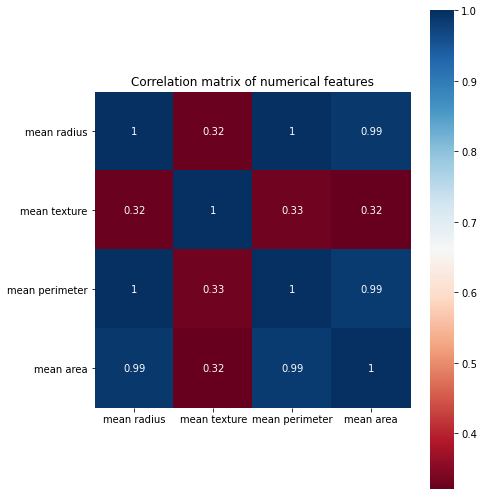

In [48]:
#Let check correlation between them
corr=sub_data.corr()
plt.subplots(figsize=(7,7));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

All these three features are correlated with the target, so they could all be of interest. When we check the correlation with the predictor that is already in the model. We can tell that mean perimeter and mean area are highly correlated with mean radius. So Probably they would not bring additional information the model. Mean texture seems not very correlated with mean radius, so probably it is the best predictor to add in order to improve the accuracy of the model.

  #### Re-train your logistic regression with your two predictors (mean radius and the one you have picked).

In [53]:
X_2 =  dataset[['mean radius','mean texture']].values
y_2 = dataset['tumor type']

In [54]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25, random_state = 0)

In [55]:
# Scaling
sc_2 = StandardScaler()
X_train_2 = sc_2.fit_transform(X_train_2)
X_test_2 = sc_2.transform(X_test_2)

In [56]:
# Training 
classifier_2 = LogisticRegression()
classifier_2.fit(X_train_2, y_train_2)

LogisticRegression()

#### How have the classification performances increased?

In [57]:
# Proba and prediction
y_proba_2 = classifier_2.predict_proba(X_test_2)
y_pred_2 = classifier_2.predict(X_test_2)

In [58]:
# to make sure the result, let call function to calculate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def Performance_model(y_test,y_pred):
    print('Accuracy is ' + str(round(accuracy_score(y_test, y_pred),2)))
    print('Precision is ' + str(round(precision_score(y_test, y_pred),2)))
    print('Recall is ' + str(round(recall_score(y_test, y_pred),2)))
    print('F1 score is ' + str(round(f1_score(y_test, y_pred), 2)))

In [59]:
Performance_model(y_test_2,y_pred_2)

Accuracy is 0.9
Precision is 0.87
Recall is 0.87
F1 score is 0.87


So we see that the recall slightly increased from 0.85 to 0.87

### Plot the ROC curves of the two previous models and make the comparison

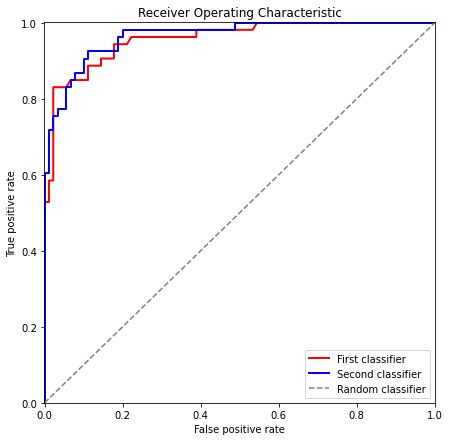

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
y_score_2 = y_proba_2[:,1]

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
# Plot ROC curve for first classifier
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
plt.plot(false_positive_rate, true_positive_rate, c='red', linewidth=2, label='First classifier')
# Plot ROC curve for second classifier
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_2)
plt.plot(false_positive_rate, true_positive_rate, c='blue', linewidth=2, label='Second classifier')
# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

The two classifiers are very similar. Though, the second classifier is sightly better for most threshlod values.

### Compute the LogLoss values of the two previous models and make the comparison.

In [62]:
from sklearn.metrics import log_loss

print(log_loss(y_test, y_score))
print(log_loss(y_test, y_score_2))

0.26157558705399137
0.23166475396532962


The second classifier has a lower logLoss than the first one, i.e. better performance.